In [48]:
import pandas as pd
import matplotlib
import plotly
import seaborn as sns
import numpy as np
import geopandas as gpd
import geodatasets

In [50]:
#setting visualization styles
sns.set_theme()


In [97]:
# Loading the data set

df = pd.read_csv("D:\Global Health Indicators\Data\world_health_data.csv")

# Exploratory Data Analysis

In [100]:
df.sample(10)

,country,country_code,year,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment
373,IDA only,IDX,2000,3.589792,57.110053,654.0,80.596182,40.280774,126.930463,2.243987,NaN,NaN
60,Algeria,DZA,1999,NaN,70.032000,NaN,36.800000,22.600000,43.200000,0.100000,NaN,NaN
5880,Bolivia,BOL,2021,8.159728,63.630000,NaN,20.300000,13.200000,24.800000,0.400000,106.0,20.300000
4167,Norway,NOR,2014,9.280000,82.100000,3.0,2.300000,1.600000,2.800000,NaN,6.8,2.500000
2205,France,FRA,2007,10.315644,81.112195,8.0,3.200000,2.400000,4.400000,0.300000,11.0,2.500000
3023,Honduras,HND,2010,8.725364,71.088000,73.0,20.800000,13.900000,24.600000,0.400000,43.0,15.900000
1854,Vanuatu,VUT,2005,3.305286,69.390000,98.0,22.800000,11.500000,27.200000,NaN,83.0,6.800000
2821,Middle East & North Africa (excluding high inc...,MNA,2009,5.280431,71.010828,78.0,25.327358,17.063506,30.518739,0.100000,39.0,7.551328
3325,St. Lucia,LCA,2011,5.079981,72.944000,74.0,16.200000,12.600000,17.900000,NaN,4.7,NaN
5381,East Asia & Pacific (excluding high income),EAP,2019,5.067153,75.992673,65.0,12.511055,7.755625,15.642049,NaN,142.0,3.631607


In [102]:
#Checking for missing values
df.isnull().sum()

country                     0
country_code                0
year                        0
health_exp               1483
life_expect               460
maternal_mortality       1757
infant_mortality          794
neonatal_mortality        794
under_5_mortality         794
prev_hiv                 2380
inci_tuberc              1221
prev_undernourishment    1845
dtype: int64

In [137]:
import numpy as np

# Fill missing values for numeric columns with the median
numeric_df = df.select_dtypes(include=[np.number])
df[numeric_df.columns] = numeric_df.fillna(numeric_df.median())

# Fill missing values for non-numeric columns with the mode (most frequent value)
non_numeric_df = df.select_dtypes(exclude=[np.number])
df[non_numeric_df.columns] = non_numeric_df.fillna(non_numeric_df.mode().iloc[0])

# Now, df has filled missing values for both numeric and non-numeric columns
df.isnull().sum()

country                  0
country_code             0
year                     0
health_exp               0
life_expect              0
maternal_mortality       0
infant_mortality         0
neonatal_mortality       0
under_5_mortality        0
prev_hiv                 0
inci_tuberc              0
prev_undernourishment    0
dtype: int64

## 1.Distrubution of Health Expenditure(% of GDP)

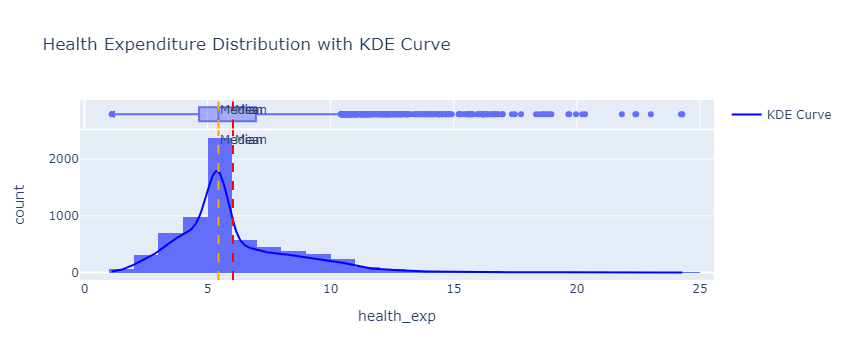

In [139]:
from scipy.stats import gaussian_kde

# Data Preparation
mean_value = df['health_exp'].mean()
median_value = df['health_exp'].median()

# KDE Curve Calculation
x = np.linspace(df['health_exp'].min(), df['health_exp'].max(), 500)
kde = gaussian_kde(df['health_exp'])
kde_y = kde(x)

# Plot Histogram with Marginal
fig = px.histogram(
    df, 
    x='health_exp', 
    nbins=30, 
    marginal='box',  # 'box' or 'violin'
    title='Health Expenditure Distribution with KDE Curve'
)

# Adding KDE Curve
fig.add_trace(
    go.Scatter(
        x=x, 
        y=kde_y * len(df['health_exp']) * (df['health_exp'].max() - df['health_exp'].min()) / 30, 
# Scale to match histogram
        mode='lines', 
        line=dict(color='blue', width=2), 
        name='KDE Curve'
    )
)

# Adding Mean and Median Lines
fig.add_vline(x=mean_value, line_dash="dash", line_color="red", annotation_text="Mean")
fig.add_vline(x=median_value, line_dash="dash", line_color="orange", annotation_text="Median")

# Showing the Plot
fig.show()


## 2. Trends in Life Expectancy Over Time (Global Average)

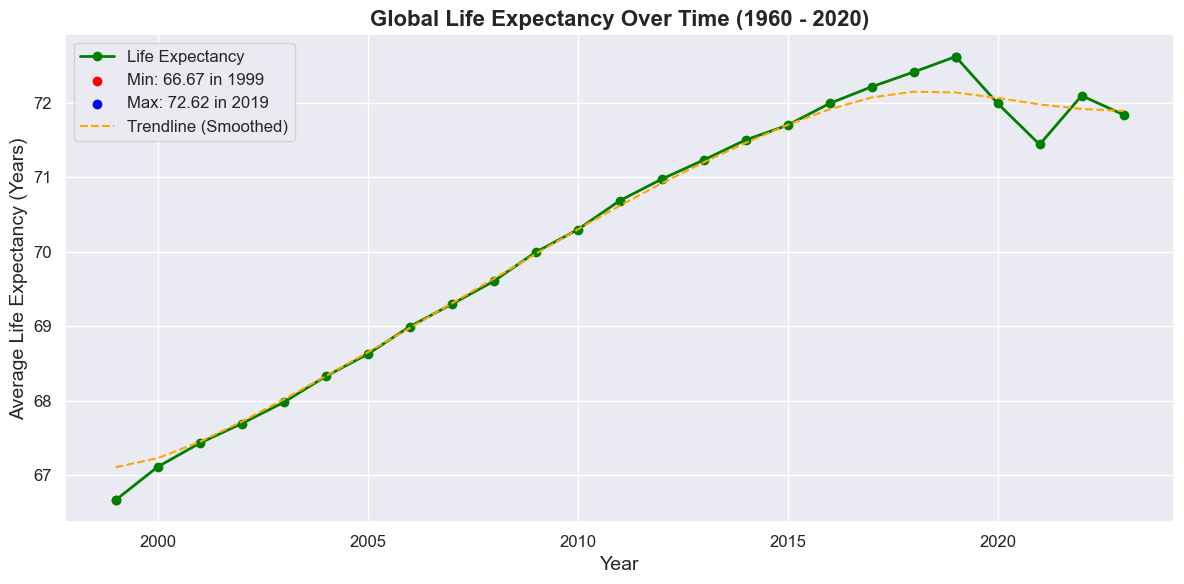

In [141]:
plt.figure(figsize=(12, 6))

# Calculating global life expectancy per year
global_life_expectancy = df.groupby('year')['life_expect'].mean()

# Plotting the data with enhancements
plt.plot(global_life_expectancy.index, global_life_expectancy.values, 
         color='green', linewidth=2, marker='o', markersize=6, label='Life Expectancy')

# Highlighting specific points (e.g., min and max life expectancy)
min_year = global_life_expectancy.idxmin()
max_year = global_life_expectancy.idxmax()
plt.scatter(min_year, global_life_expectancy[min_year], color='red', label=f'Min: {global_life_expectancy[min_year]:.2f} in {min_year}')
plt.scatter(max_year, global_life_expectancy[max_year], color='blue', label=f'Max: {global_life_expectancy[max_year]:.2f} in {max_year}')

# Adding a trendline (optional smoothing)
from scipy.ndimage import gaussian_filter1d
smoothed_values = gaussian_filter1d(global_life_expectancy.values, sigma=2)
plt.plot(global_life_expectancy.index, smoothed_values, linestyle='--', color='orange', label='Trendline (Smoothed)')

# Adding title and labels with more detail
plt.title('Global Life Expectancy Over Time (1960 - 2020)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Life Expectancy (Years)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Showing the plot
plt.tight_layout()
plt.show()


## 3. Correlation Heatmap of Key Health Indicators

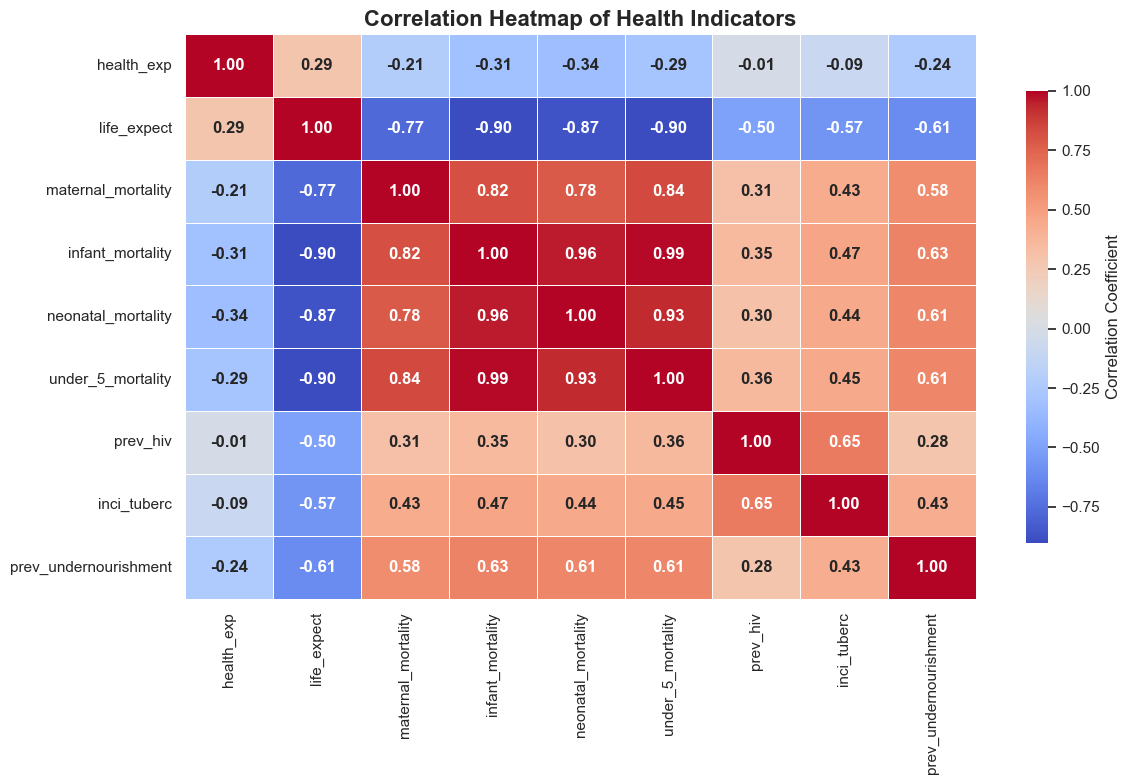

In [143]:

# Selecting the relevant health indicators and compute the correlation matrix
correlation_matrix = df[['health_exp', 'life_expect', 'maternal_mortality', 'infant_mortality', 
                         'neonatal_mortality', 'under_5_mortality', 'prev_hiv', 'inci_tuberc', 'prev_undernourishment']].corr()

# Setting the figure size for better readability
plt.figure(figsize=(12, 8))

# Generating the heatmap with enhanced readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
            annot_kws={'size': 12, 'weight': 'bold'}, cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'})

# Setting the title and labels
plt.title('Correlation Heatmap of Health Indicators', fontsize=16, fontweight='bold')

# Adjusting layout for better spacing
plt.tight_layout()

# Showing the heatmap
plt.show()


## 4. Life Expectancy vs. Health Expenditure

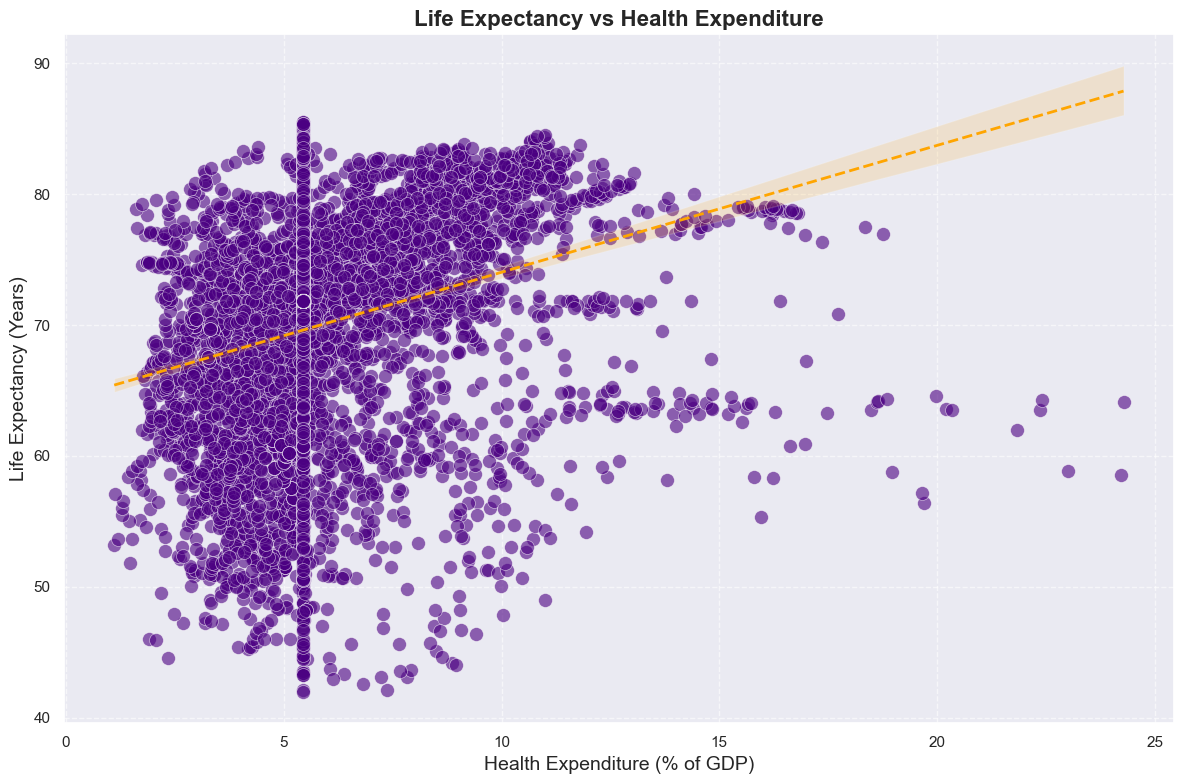

In [145]:
# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Scatter plot with enhancements
sns.scatterplot(x='health_exp', y='life_expect', data=df, color='indigo', alpha=0.6, s=100, edgecolor='w', linewidth=0.5)

# Adding a regression line to visualize the trend
sns.regplot(x='health_exp', y='life_expect', data=df, scatter=False, color='orange', line_kws={"linewidth": 2, 'linestyle': '--'})

# Title and axis labels
plt.title('Life Expectancy vs Health Expenditure', fontsize=16, fontweight='bold')
plt.xlabel('Health Expenditure (% of GDP)', fontsize=14)
plt.ylabel('Life Expectancy (Years)', fontsize=14)

# Adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Showing the plot
plt.tight_layout()
plt.show()


## 5. Infant Mortality Rate vs. Maternal Mortality Rate

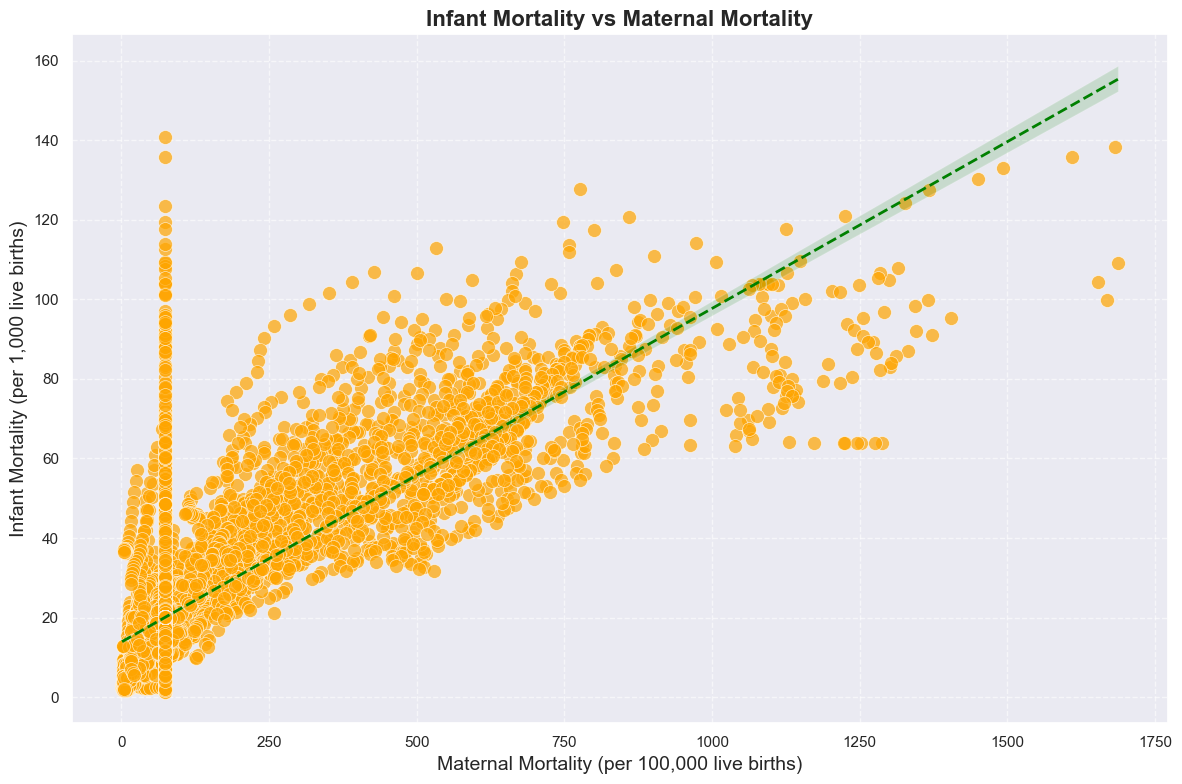

In [147]:
# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Scatter plot with improvements
sns.scatterplot(x='maternal_mortality', y='infant_mortality', data=df, color='orange', alpha=0.7, s=100, edgecolor='w', linewidth=0.5)

#Adding a regression line (if there's a visible trend)
sns.regplot(x='maternal_mortality', y='infant_mortality', data=df, scatter=False, color='green', line_kws={"linewidth": 2, 'linestyle': '--'})

#Title and axis labels
plt.title('Infant Mortality vs Maternal Mortality', fontsize=16, fontweight='bold')
plt.xlabel('Maternal Mortality (per 100,000 live births)', fontsize=14)
plt.ylabel('Infant Mortality (per 1,000 live births)', fontsize=14)

#Adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Showing the plot with tight layout
plt.tight_layout()
plt.show()


  ## 6. Trends in Under-5 Mortality Rate Over Time

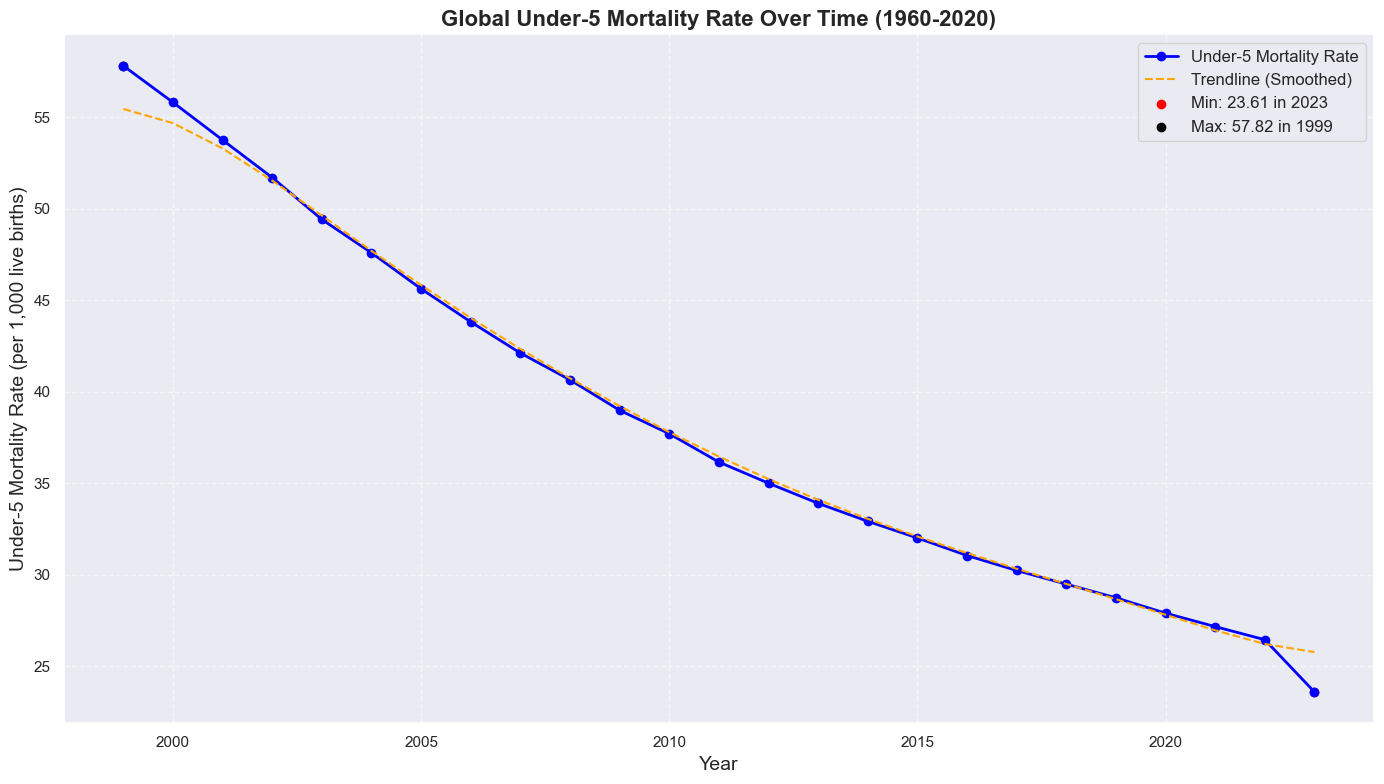

In [149]:
from scipy.ndimage import gaussian_filter1d

# Setting figure size
plt.figure(figsize=(14, 8))

# Calculation of global average of under-5 mortality rate by year
global_under_5_mortality = df.groupby('year')['under_5_mortality'].mean()

# Plotting the line graph
plt.plot(global_under_5_mortality.index, global_under_5_mortality.values, 
         color='blue', linewidth=2, marker='o', markersize=6, label='Under-5 Mortality Rate')

# Adding a smoothed trendline
smoothed_values = gaussian_filter1d(global_under_5_mortality.values, sigma=2)
plt.plot(global_under_5_mortality.index, smoothed_values, linestyle='--', color='orange', label='Trendline (Smoothed)')

# Highlighting key points (min and max)
min_year = global_under_5_mortality.idxmin()
max_year = global_under_5_mortality.idxmax()
plt.scatter(min_year, global_under_5_mortality[min_year], color='red', label=f'Min: {global_under_5_mortality[min_year]:.2f} in {min_year}')
plt.scatter(max_year, global_under_5_mortality[max_year], color='black', label=f'Max: {global_under_5_mortality[max_year]:.2f} in {max_year}')

# Setting title and labels
plt.title('Global Under-5 Mortality Rate Over Time (1960-2020)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Under-5 Mortality Rate (per 1,000 live births)', fontsize=14)

# Adding grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()


## 7. Top 10 Countries with Highest HIV Prevalence

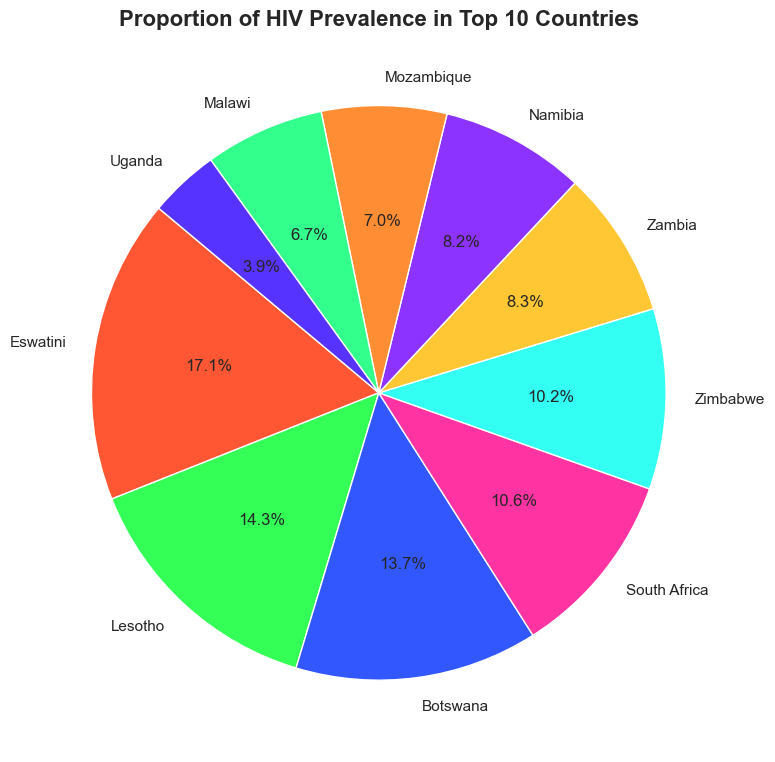

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate top 10 countries by average HIV prevalence
top_hiv_countries = df.groupby('country')['prev_hiv'].mean().sort_values(ascending=False).head(10)

# Define a list of distinct colors for the pie chart
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#33FFF3', '#FFC733', '#8D33FF', '#FF8D33', '#33FF8D', '#5733FF']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_hiv_countries.values, 
    labels=top_hiv_countries.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors
)
plt.title('Proportion of HIV Prevalence in Top 10 Countries', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



# Show the plot
plt.show()


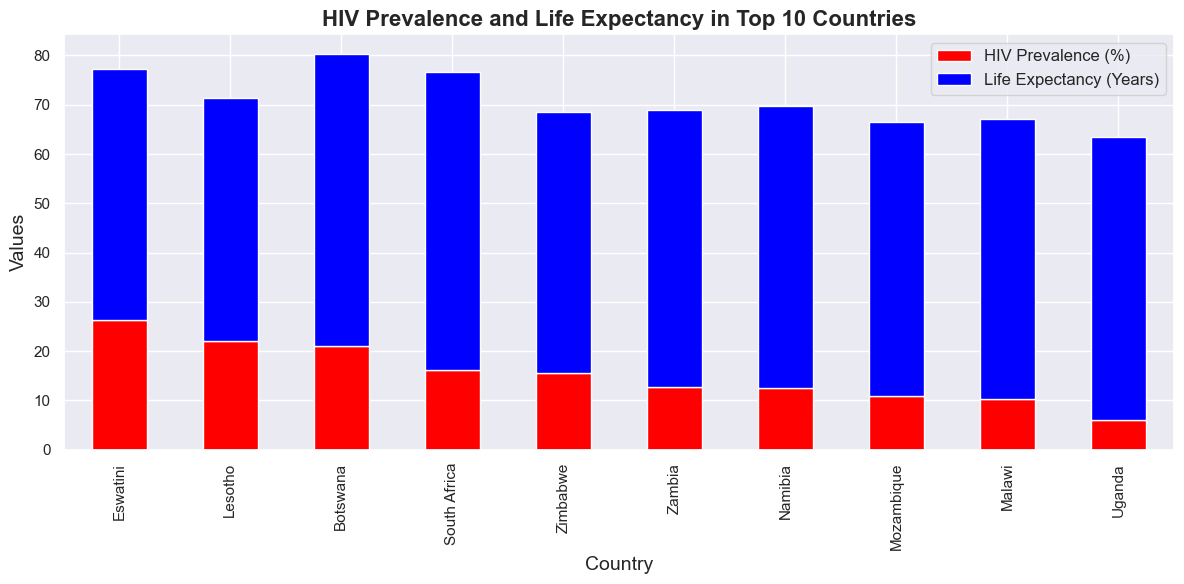

In [153]:
#Prevalence of HIV with another indicator: life expectancy
stacked_data = df.groupby('country')[['prev_hiv', 'life_expect']].mean().sort_values(by='prev_hiv', ascending=False).head(10)
stacked_data.plot(kind='bar', figsize=(12, 6), stacked=True, color=['red', 'blue'])
plt.title('HIV Prevalence and Life Expectancy in Top 10 Countries', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend(['HIV Prevalence (%)', 'Life Expectancy (Years)'], fontsize=12)
plt.tight_layout()
plt.show()


## 8. Geographical Distribution of Life Expectancy

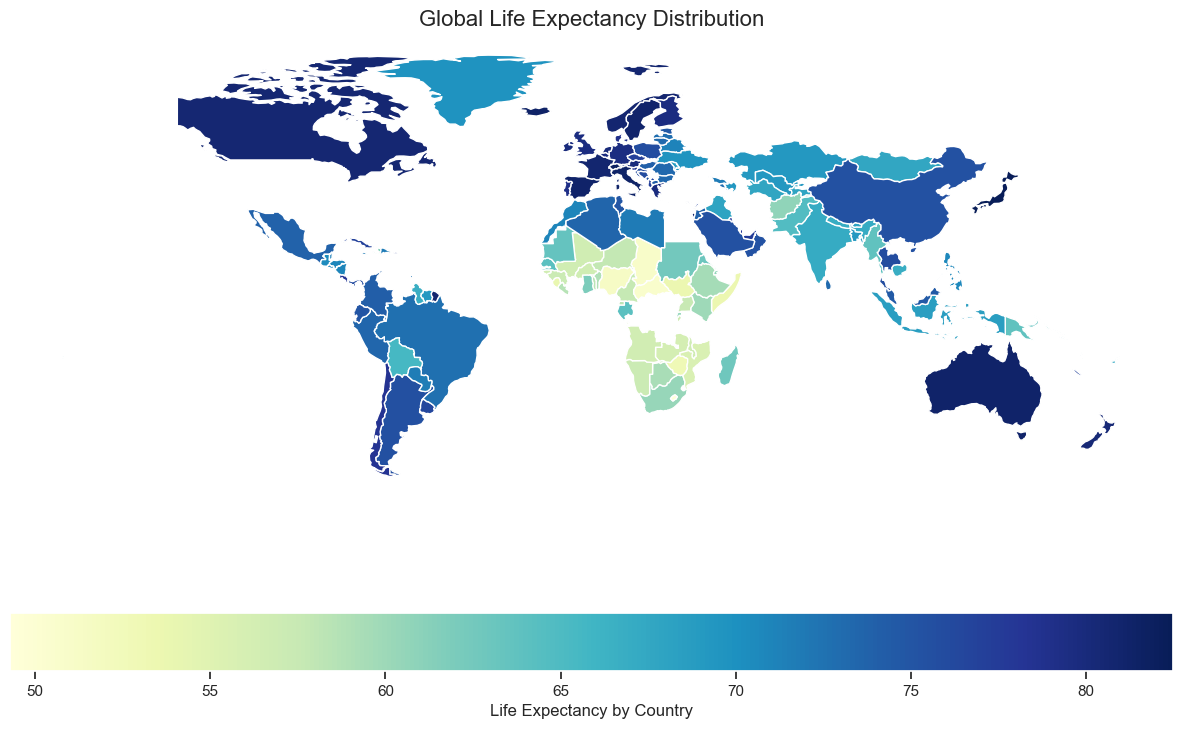

In [173]:
# Aggregating life expectancy by country (you can choose another method like 'median' or 'max')
df_aggregated = df.groupby('country')['life_expect'].mean().reset_index()

# Now, merge the aggregated data with the shapefile
merged_1= world.set_index('ADMIN').join(df_aggregated.set_index('country'), how='inner')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_1.plot(column='life_expect', ax=ax, legend=True,
            cmap='YlGnBu',
            legend_kwds={'label': "Life Expectancy by Country", 'orientation': "horizontal"})
plt.title('Global Life Expectancy Distribution', fontsize=16)
plt.axis('off')
plt.show()


## 9. Comparison of Mortality Rates Across Countries

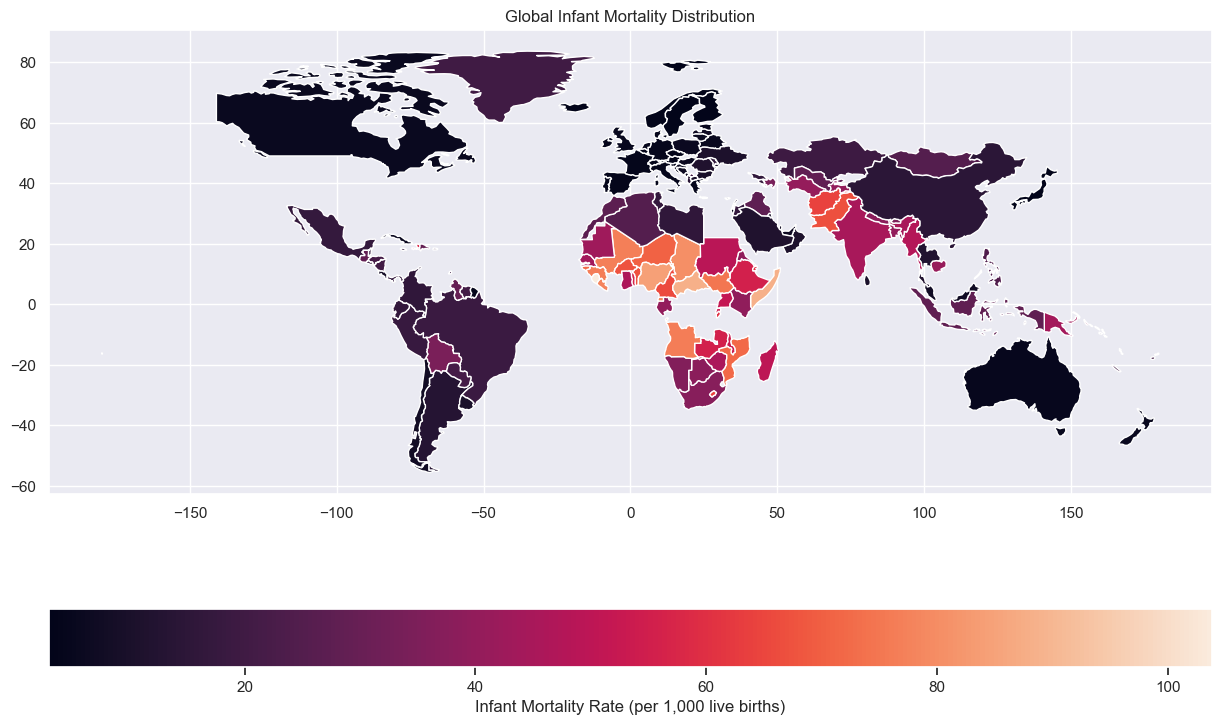

In [185]:
df_aggregated_2= df.groupby('country')['infant_mortality'].mean().reset_index()
merged_2= world.set_index('ADMIN').join(df_aggregated_2.set_index('country'), how='inner')


# Plot the choropleth map for Infant Mortality
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_2.plot(column='infant_mortality', ax=ax, legend=True,
           legend_kwds={'label': "Infant Mortality Rate (per 1,000 live births)",
                        'orientation': "horizontal"})
plt.title('Global Infant Mortality Distribution')
plt.show()